In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [2]:
# Load the dataset

In [3]:

file_path = 'Test_data (1).csv'  
data = pd.read_csv(file_path)

In [4]:
# Display the first few rows of the dataset

In [5]:
print(data.head(5))

   employee_id         department     region   education gender  \
0         8724         Technology  region_26  Bachelor's      m   
1        74430                 HR   region_4  Bachelor's      f   
2        72255  Sales & Marketing  region_13  Bachelor's      m   
3        38562        Procurement   region_2  Bachelor's      f   
4        64486            Finance  region_29  Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                  1              1            0                  77  
1                  5              0     

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB
None


In [7]:
# Step 1: Data Preprocessing

In [8]:
# Handle missing values
y_imputer = SimpleImputer(strategy='median')
data['previous_year_rating'] = y_imputer.fit_transform(data[['previous_year_rating']])


In [9]:
# Separate features and target
X = data.drop(['employee_id', 'previous_year_rating'], axis=1)
y = data['previous_year_rating']

In [10]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [11]:
# Preprocessing for numerical data: impute missing values and scale
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [12]:
# Preprocessing for categorical data: impute missing values and one-hot encode
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [13]:
# Combine numerical and categorical pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Step 2: Exploratory Data Analysis (EDA)

In [16]:
# Summary statistics
print(data.describe())

        employee_id  no_of_trainings           age  previous_year_rating  \
count  23490.000000     23490.000000  23490.000000          23490.000000   
mean   39041.399149         1.254236     34.782929              3.312984   
std    22640.809201         0.600910      7.679492              1.216959   
min        3.000000         1.000000     20.000000              1.000000   
25%    19370.250000         1.000000     29.000000              3.000000   
50%    38963.500000         1.000000     33.000000              3.000000   
75%    58690.000000         1.000000     39.000000              4.000000   
max    78295.000000         9.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  
count       23490.000000   23490.000000  23490.000000        23490.000000  
mean            5.810387       0.358834      0.022776           63.263133  
std             4.207917       0.479668      0.149191           13.411750  
min        

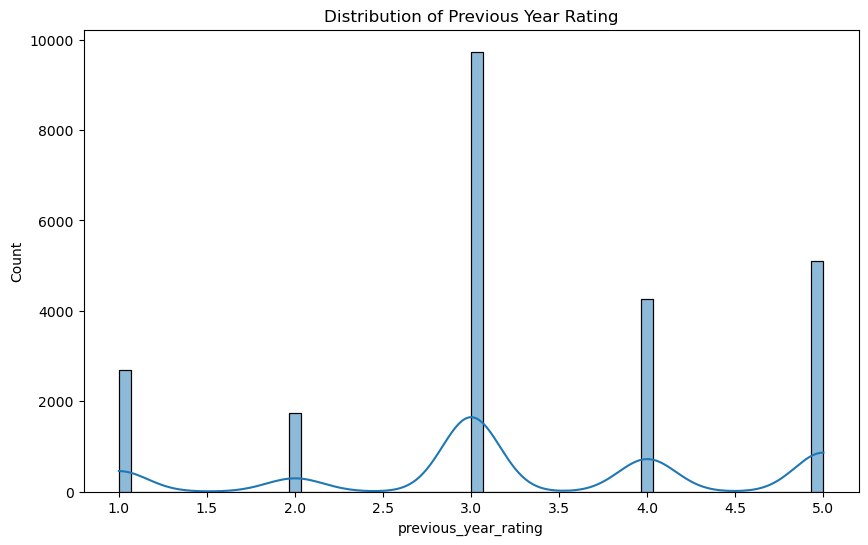

In [17]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['previous_year_rating'], kde=True)
plt.title('Distribution of Previous Year Rating')
plt.show()

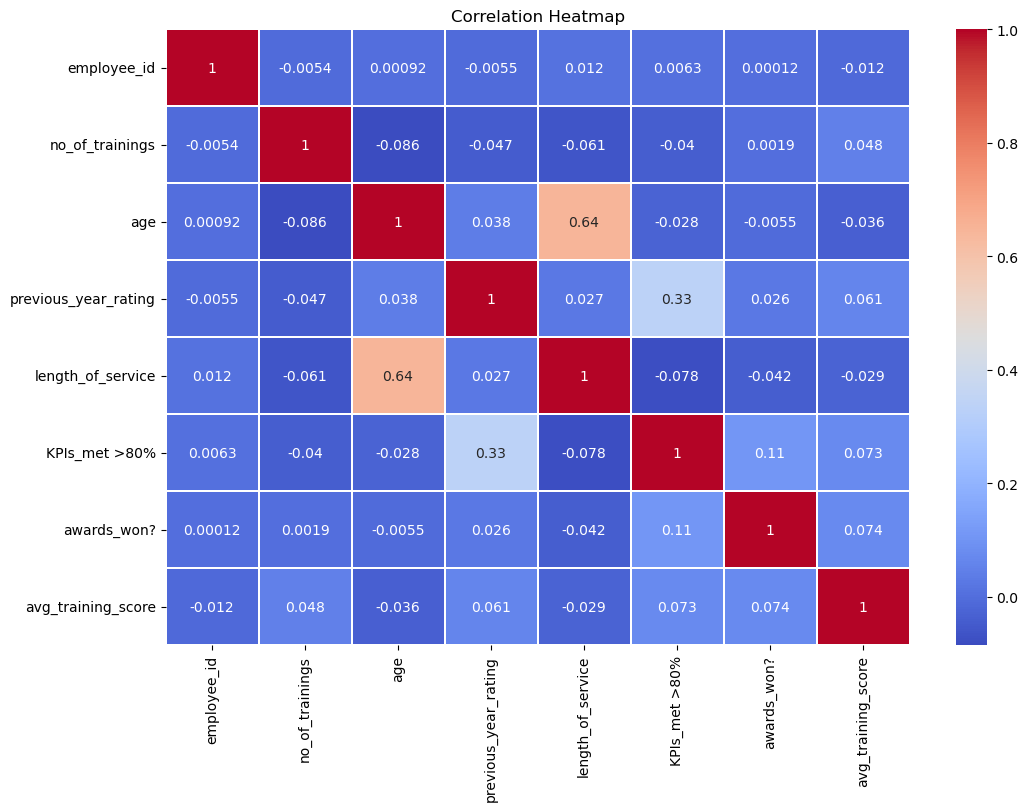

In [18]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Heatmap')
plt.show()

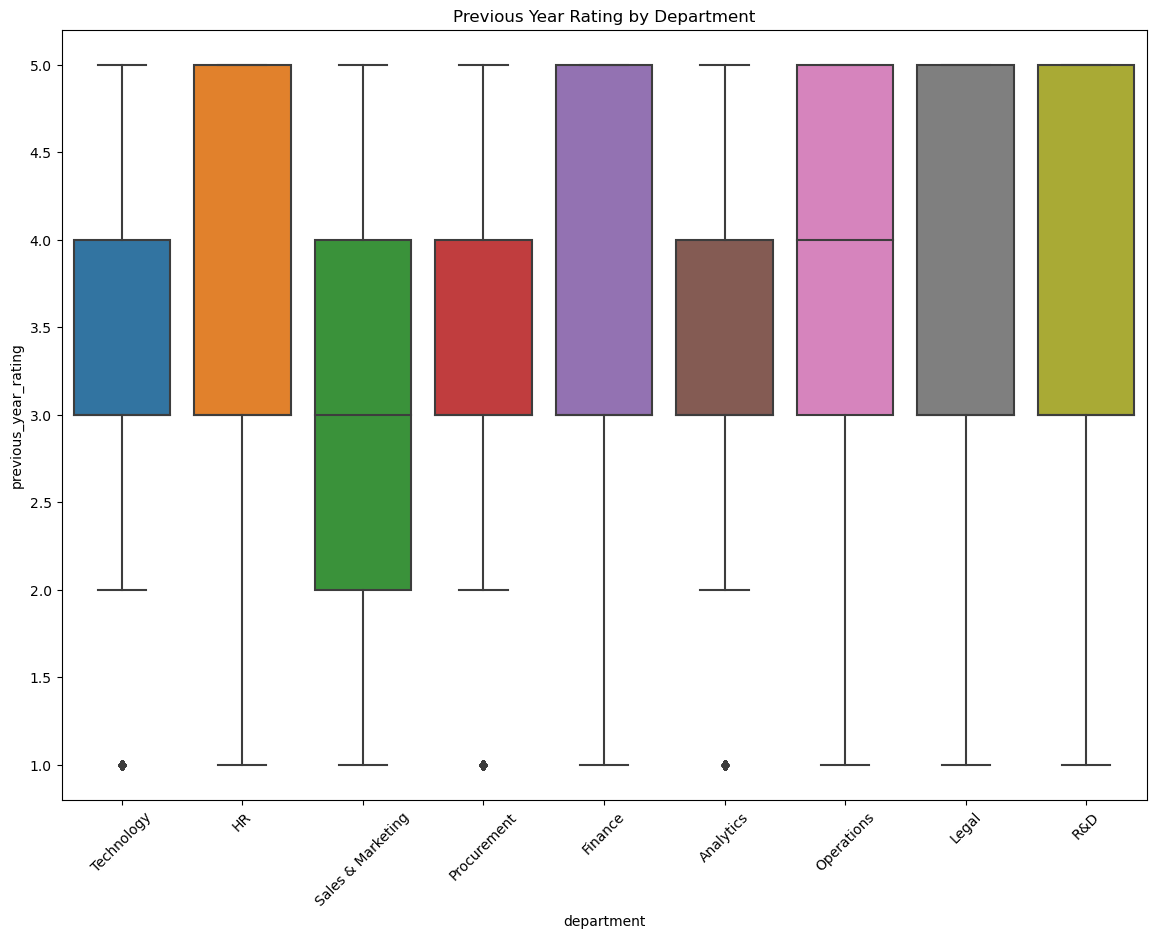

In [19]:
# Box plots for categorical features
plt.figure(figsize=(14, 10))
sns.boxplot(x='department', y='previous_year_rating', data=data)
plt.title('Previous Year Rating by Department')
plt.xticks(rotation=45)
plt.show()


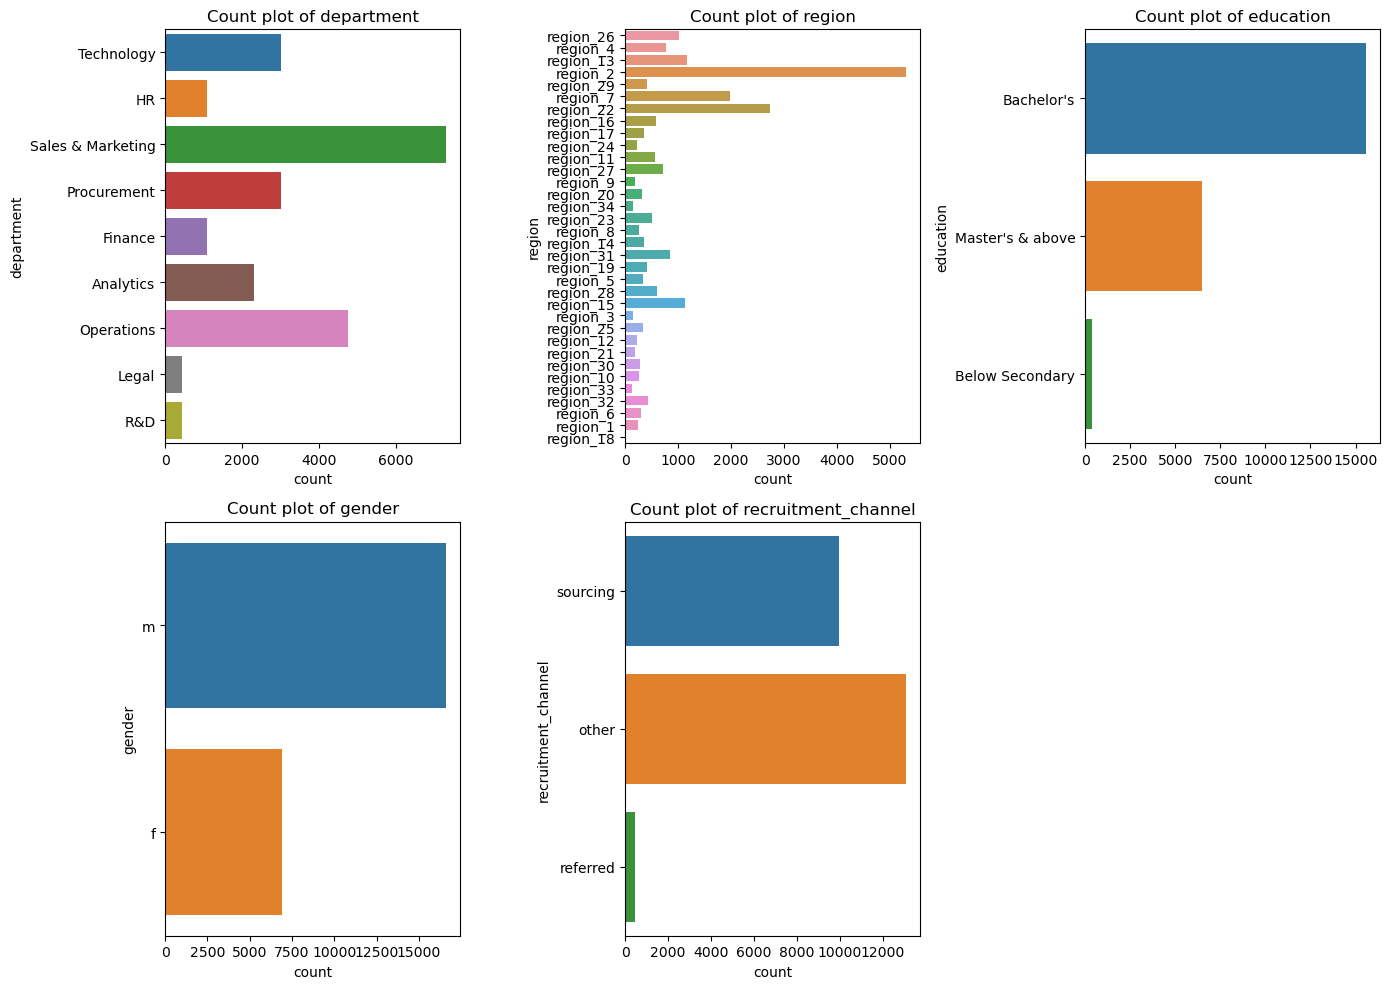

In [20]:
# Count plot for categorical features
plt.figure(figsize=(14, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=col, data=data)
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()



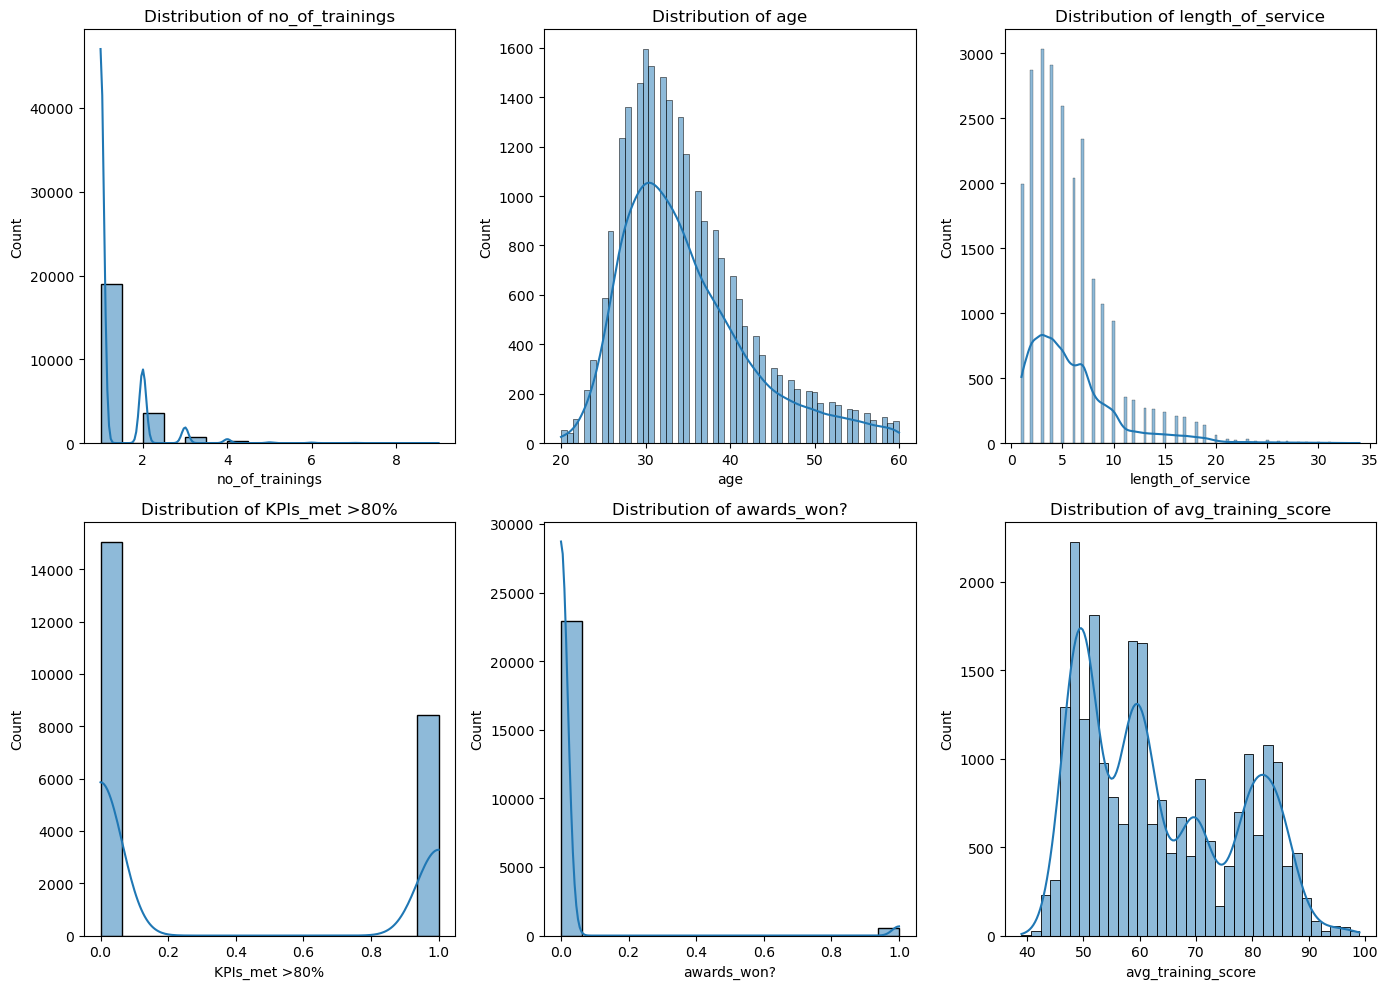

In [21]:
import math

# Determine the number of rows and columns for the subplots
num_plots = len(num_cols)
num_cols_per_row = 3
num_rows = math.ceil(num_plots / num_cols_per_row)

plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(num_rows, num_cols_per_row, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()
